In [52]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import interpolate as interp

# Q3

In [150]:
def lakeshore(V, data):
    if isinstance(V, float):
        temp = V
        V = np.ndarray(1)
        V[0] = temp
    voltage = []
    temp = []
    resamples = 10
    sample_len = np.int(0.8*len(data))
    temp_interp= [[0]*len(V)]*resamples
    for k in range(resamples):
        data_sample = random.sample(data.tolist(), np.int(0.8*len(data)))
        v = []
        t = []
        for i in range(len(data_sample)):
            v.append(data_sample[i][0])
            t.append(data_sample[i][1])
        if data[0][0] not in v:
            v.append(data[0][0])
            t.append(data[0][1])
        if data[len(data) - 1][0] not in v:
            v.append(data[len(data) -1][0])
            t.append(data[len(data) -1][1])
        voltage = [y for y,_ in sorted(zip(v,t))]
        temp = [y for _,y in sorted(zip(v,t))]
        for i in range(len(V)):    
            ind=np.max(np.where(V[i]>=voltage)[0])
            if (ind-1)>=0 and (ind+2)<len(voltage):
                V_use=voltage[ind-1:ind+3]
                T_use=temp[ind-1:ind+3]
                pars=np.polyfit(V_use,T_use,3)
                T_pred=np.polyval(pars,V[i])
                temp_interp[k][i]=T_pred
            if ind==0:
                V_use=voltage[ind:ind+3]
                T_use=temp[ind:ind+3]
                pars=np.polyfit(V_use,T_use,2)
                T_pred=np.polyval(pars,V[i])
                temp_interp[k][i]=T_pred
            if (ind+2)==len(voltage):
                V_use=voltage[ind-1:ind+2]
                T_use=temp[ind-1:ind+2]
                pars=np.polyfit(V_use,T_use,2)
                T_pred=np.polyval(pars,V[i])
                temp_interp[k][i]=T_pred
    temp_pred = []
    temp_std = []
    for i in range(len(V)):
        temp_resample = []
        for k in range(resamples):
            temp_resample.append(temp_interp[k][i])
        temp_pred.append(np.mean(temp_resample))
        temp_std.append(np.std(temp_resample))
    return temp_pred, temp_std

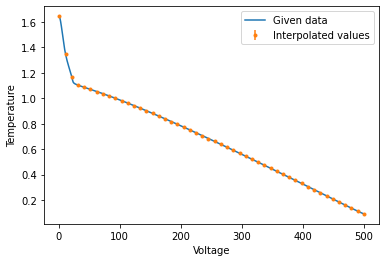

In [183]:
#V is an array
dat=np.loadtxt("lakeshore.txt")
voltage = []
temp = []
for i in range(len(dat)):
    voltage.append(dat[i][0])
    temp.append(dat[i][1])
V = np.linspace(dat[0][0]+0.01, dat[len(dat)-1][0]-0.01, 50)
pred, std = lakeshore(V, dat)
plt.plot(voltage, temp, label='Given data')
plt.errorbar(V, pred, yerr=std, fmt='.', label='Interpolated values')
plt.legend()
plt.xlabel("Voltage")
plt.ylabel("Temperature")
plt.savefig("Q2_1.png")

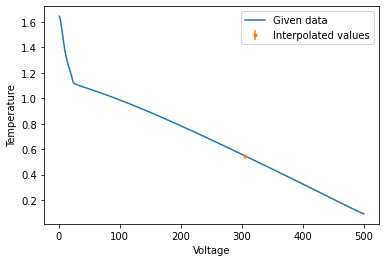

In [184]:
#V is a float value
dat=np.loadtxt("lakeshore.txt")
voltage = []
temp = []
for i in range(len(dat)):
    voltage.append(dat[i][0])
    temp.append(dat[i][1])
V = 305.23
pred, std = lakeshore(V, dat)
plt.plot(voltage, temp, label='Given data')
plt.errorbar(V, pred, yerr=std, fmt='.', label='Interpolated values')
plt.legend()
plt.xlabel("Voltage")
plt.ylabel("Temperature")
plt.savefig("Q2_2.png")

# Q1

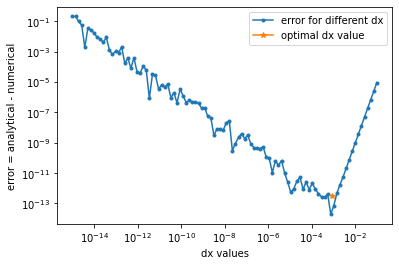

In [186]:
#fun = exp(x)
fun=np.exp
x0=1
d_anal = fun(x0)
logdx=np.linspace(-15,-1,100)
dx=10**logdx
best_dx = pow(fun(x0)/fun(x0), 1/5)*pow(10,-3.2)*pow(210/48, 1/5)
d_num = []
error = []
for i in range(len(dx)):
    y0=fun(x0)
    d1=(fun(x0+dx[i]) - fun(x0-dx[i]))/(2*dx[i])
    d2=(fun(x0+2*dx[i]) - fun(x0-2*dx[i]))/(2*2*dx[i])
    d = (4*d1 - d2)/3
    e = np.abs(d-d_anal)
    d_num.append(d)
    error.append(e)
best_d1 = (fun(x0+best_dx) - fun(x0-best_dx))/(2*best_dx)
best_d2 = (fun(x0+2*best_dx) - fun(x0-2*best_dx))/(2*2*best_dx)
best_d = (4*best_d1 - best_d2)/3
best_error = np.abs(best_d-d_anal)
plt.loglog(dx,error, marker = '.', label = 'error for different dx')
plt.loglog(best_dx, best_error, marker= '*', label = 'optimal dx value')
plt.xlabel("dx values")
plt.ylabel("error = analytical - numerical")
plt.legend()
plt.savefig("Q1_1.png")

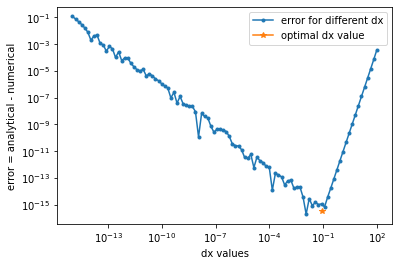

In [187]:
# fun = exp(0.01x)
fun=np.exp
x0=1
d_anal = 0.01*fun(0.01*x0)
logdx=np.linspace(-15,2,100)
dx=10**logdx
best_dx = pow(fun(0.01*x0)/(pow(0.01,5)*fun(0.01*x0)), 1/5)*pow(10,-3.2)*pow(210/48, 1/5)
d_num = []
error = []
for i in range(len(dx)):
    y0=fun(0.01*x0)
    d1=(fun(0.01*(x0+dx[i])) - fun(0.01*(x0-dx[i])))/(2*dx[i])
    d2=(fun(0.01*(x0+2*dx[i])) - fun(0.01*(x0-2*dx[i])))/(2*2*dx[i])
    d = (4*d1 - d2)/3
    e = np.abs(d-d_anal)
    d_num.append(d)
    error.append(e)
best_d1 = (fun(0.01*(x0+best_dx)) - fun(0.01*(x0-best_dx)))/(2*best_dx)
best_d2 = (fun(0.01*(x0+2*best_dx)) - fun(0.01*(x0-2*best_dx)))/(2*2*best_dx)
best_d = (4*best_d1 - best_d2)/3
best_error = np.abs(best_d-d_anal)
plt.loglog(dx,error, marker = '.', label = 'error for different dx')
plt.loglog(best_dx, best_error, marker= '*', label = 'optimal dx value')
plt.xlabel("dx values")
plt.ylabel("error = analytical - numerical")
plt.legend()
plt.savefig("Q1_2.png")

# Q2

In [177]:
def ndiff(fun,x,full=False):
    #Averaging the d obtained from an array of dx values to get a good estimate of true_d
    logdx=np.linspace(-15,-1,100)
    dx=10**logdx
    d_num = []
    for i in range(len(dx)):
        d_num.append((fun(x+dx[i]) - fun(x-dx[i]))/(2*dx[i]))
    d_real = np.mean(d_num)
    #Taking an initial guess of dx to d3, then getting the optimal dx and eventually dx from it
    dx_initial = 0.01
    d3 = (fun(x+2*dx_initial) - 2*fun(x+dx_initial) + 2*fun(x-dx_initial) - fun(x-2*dx_initial))/(2*pow(dx_initial,3))
    dx_optimal = pow(3/4, 1/3)*pow(fun(x)/d3, 1/3)*pow(10, -5.33)
    d = (fun(x+dx_optimal) - fun(x-dx_optimal))/(2*dx_optimal)
    error = np.abs(d - d_real)
    if full==False:
        return d
    else:
        return d, dx_optimal, error   

In [178]:
fun = np.exp
ndiff(fun,1)

2.7182818284440327

In [179]:
fun = np.exp
ndiff(fun,1,full=True)

(2.7182818284440327, 4.2496203725731285e-06, 0.0016672957999142035)

# Q4

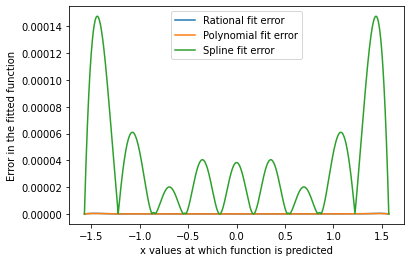

In [180]:
#cox(x)
xfine=np.linspace(-np.pi/2,np.pi/2,1001)
fun=np.cos
y_true=fun(xfine)

#rational fit
n=5 #numerator order
m=4 #denominator order
x=np.linspace(-np.pi/2,np.pi/2,n+m+1)
y=fun(x)
pcols=[x**k for k in range(n+1)]
pmat=np.vstack(pcols)
qcols=[-x**k*y for k in range(1,m+1)]
qmat=np.vstack(qcols)
mat=np.hstack([pmat.T,qmat.T])
coeffs=np.linalg.inv(mat)@y
p=0
for i in range(n+1):
    p=p+coeffs[i]*xfine**i
qq=1
for i in range(m):
    qq=qq+coeffs[n+1+i]*xfine**(i+1)
y_pred_rat=p/qq
rat_error = np.abs(y_true - y_pred_rat)

#polynomial fit
poly_coeffs=np.polyfit(x,y,len(y)-1)
y_pred_poly=np.polyval(poly_coeffs,xfine)
poly_error = np.abs(y_true - y_pred_poly)

#cubic spline 
spl=interp.splrep(x,y)
y_pred_spline=interp.splev(xfine,spl)
spline_error = np.abs(y_true - y_pred_spline)

plt.plot(xfine,rat_error, label='Rational fit error')
plt.plot(xfine, poly_error, label='Polynomial fit error')
plt.plot(xfine, spline_error, label='Spline fit error')
plt.xlabel("x values at which function is predicted")
plt.ylabel("Error in the fitted function")
plt.legend()
plt.savefig("Q4_1.png")

coefficients for P(x) and Q(x):
[ 1.00000000e+00 -2.66453526e-15  1.42108547e-14  8.88178420e-16
 -7.10542736e-15  1.77635684e-15  1.00000000e+00]


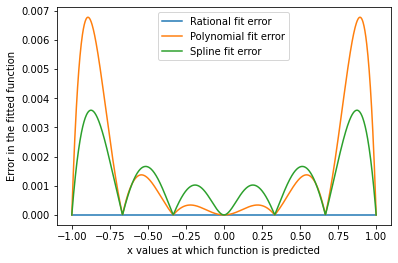

In [169]:
#lorentzian
xfine=np.linspace(-1,1,1001)
y_true=[]
for i in xfine:
    y_true.append(1/(1+i**2))

#rational fit
n=4 #numerator order
m=2 #denominator order

x=np.linspace(-1,1,n+m+1)
y = []
for i in x:
    y.append(1/(1+i**2))

pcols=[x**k for k in range(n+1)]
pmat=np.vstack(pcols)

qcols=[-x**k*y for k in range(1,m+1)]
qmat=np.vstack(qcols)
mat=np.hstack([pmat.T,qmat.T])
coeffs=np.linalg.inv(mat)@y
print("coefficients for P(x) and Q(x):")
print(coeffs)
p=0
for i in range(n+1):
    p=p+coeffs[i]*xfine**i
qq=1
for i in range(m):
    qq=qq+coeffs[n+1+i]*xfine**(i+1)

y_pred_rat=p/qq
rat_error = np.abs(y_true - y_pred_rat)

#polynomial fit
poly_coeffs=np.polyfit(x,y,len(y)-1)
y_pred_poly=np.polyval(poly_coeffs,xfine)
poly_error = np.abs(y_true - y_pred_poly)

#cubic spline 
spl=interp.splrep(x,y)
y_pred_spline=interp.splev(xfine,spl)
spline_error = np.abs(y_true - y_pred_spline)


plt.plot(xfine,rat_error, label='Rational fit error')
plt.plot(xfine, poly_error, label='Polynomial fit error')
plt.plot(xfine, spline_error, label='Spline fit error')
plt.legend()
plt.xlabel("x values at which function is predicted")
plt.ylabel("Error in the fitted function")
plt.savefig("Q4_2.png")

coefficients for P(x) and Q(x):
[-21.75840561  12.          -4.          -2.           0.57033844
  12.          -1.5          7.          -0.5         -4.        ]


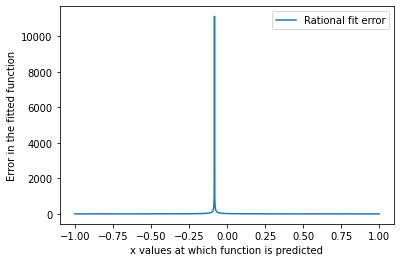

In [181]:
#lorentzian with higher order 
xfine=np.linspace(-1,1,1001)
y_true=[]
for i in xfine:
    y_true.append(1/(1+i**2))

#rational fit
n=4 #numerator order
m=5 #denominator order

x=np.linspace(-1,1,n+m+1)
y = []
for i in x:
    y.append(1/(1+i**2))

pcols=[x**k for k in range(n+1)]
pmat=np.vstack(pcols)

qcols=[-x**k*y for k in range(1,m+1)]
qmat=np.vstack(qcols)
mat=np.hstack([pmat.T,qmat.T])
coeffs=np.linalg.inv(mat)@y
print("coefficients for P(x) and Q(x):")
print(coeffs)
p=0
for i in range(n+1):
    p=p+coeffs[i]*xfine**i
qq=1
for i in range(m):
    qq=qq+coeffs[n+1+i]*xfine**(i+1)

y_pred_rat=p/qq
rat_error = np.abs(y_true - y_pred_rat)
plt.plot(xfine,rat_error, label='Rational fit error')
plt.legend()
plt.xlabel("x values at which function is predicted")
plt.ylabel("Error in the fitted function")
plt.savefig("Q4_3.png")

coefficients for P(x) and Q(x):
[ 1.00000000e+00 -1.11022302e-15 -3.33333333e-01 -6.24500451e-16
 -5.32907052e-15 -1.11022302e-15  6.66666667e-01  0.00000000e+00
 -3.33333333e-01 -2.88657986e-15]


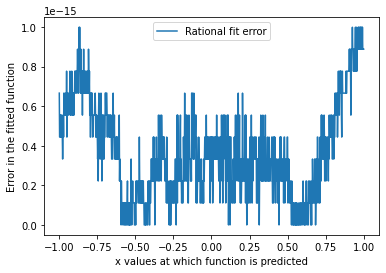

In [182]:
#lorentzian with pinv
xfine=np.linspace(-1,1,1001)
y_true=[]
for i in xfine:
    y_true.append(1/(1+i**2))

#rational fit
n=4 #numerator order
m=5 #denominator order

x=np.linspace(-1,1,n+m+1)
y = []
for i in x:
    y.append(1/(1+i**2))

pcols=[x**k for k in range(n+1)]
pmat=np.vstack(pcols)

qcols=[-x**k*y for k in range(1,m+1)]
qmat=np.vstack(qcols)
mat=np.hstack([pmat.T,qmat.T])
coeffs=np.linalg.pinv(mat)@y
print("coefficients for P(x) and Q(x):")
print(coeffs)
p=0
for i in range(n+1):
    p=p+coeffs[i]*xfine**i
qq=1
for i in range(m):
    qq=qq+coeffs[n+1+i]*xfine**(i+1)

y_pred_rat=p/qq
rat_error = np.abs(y_true - y_pred_rat)
plt.plot(xfine,rat_error, label='Rational fit error')
plt.legend()
plt.xlabel("x values at which function is predicted")
plt.ylabel("Error in the fitted function")
plt.savefig("Q4_4.png")